In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from cmlreaders import CMLReader, get_data_index
df = get_data_index("r1")


exp = 'DBOY1'
df_select = df[(df['experiment']==exp)]
df_sess = df_select.iloc[0]

#Find out the sessions, localization, and montage for this subject
sessions = list(df[(df['experiment']==exp)]['session'])
mont = int(df[(df['experiment']==exp)].iloc()[0]['montage'])      #note that *usually* mont and loc will be 0.
loc = int(df[(df['experiment']==exp)].iloc()[0]['localization'])

In [2]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.pi/18

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=True, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [3]:
#For first session...
reader = CMLReader('R1536J', exp, sessions[21], montage=mont, localization=loc)   #reader for loading CML data

#What kind of data can the reader get for us?
reader.reader_names.keys()

dict_keys(['voxel_coordinates', 'jacksheet', 'classifier_excluded_leads', 'good_leads', 'leads', 'area', 'mni_coordinates', 'electrode_coordinates', 'prior_stim_results', 'target_selection_table', 'experiment_log', 'session_json', 'all_events', 'events', 'math_events', 'ps4_events', 'task_events', 'used_classifier', 'baseline_classifier', 'sources', 'eeg', 'pairs', 'contacts', 'matlab_contacts', 'matlab_pairs', 'localization', 'electrode_categories', 'classifier_summary', 'session_summary', 'math_summary'])

In [4]:
evs = reader.load('task_events')
pd.set_option('display.max_columns', None)
evs [45:65]

,eegoffset,correctPointingDirection,eegfile,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
45,1530239,-999.000,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,-999,-999,-999,-999,-999,0,-1,1612465575651,,30.671875,-49.656250,r1,-999,-999,-999,0,-999,32.1875,-60.906250,R1536J,-999.00000,0,pointing begins
46,1539939,352.500,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,-999,-999,-999,-999,-999,0,-1,1612465585351,,30.671875,-49.656250,r1,-999,-999,-999,0,-999,32.1875,-60.906250,R1536J,39.21875,0,pointing finished
47,1557122,-999.000,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,0,0,-999,ASPARAGUS,-999,0,-1,1612465602535,,29.671875,1.487305,r1,1,-999,10,0,grocery_store,26.5000,17.000000,R1536J,-999.00000,0,WORD
48,1558455,-999.000,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,-999,-999,-999,-999,-999,0,-1,1612465603868,,28.671875,1.369141,r1,-999,-999,-999,0,-999,26.5000,17.000000,R1536J,-999.00000,0,pointing begins
49,1565154,195.250,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,-999,-999,-999,-999,-999,0,-1,1612465610568,,28.671875,1.369141,r1,-999,-999,-999,0,-999,26.5000,17.000000,R1536J,175.25000,0,pointing finished
50,1578121,-999.000,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,1,0,-999,CHALK,-999,0,-1,1612465623535,,1.383789,-30.781250,r1,1,-999,11,0,gym,14.5000,-33.687500,R1536J,-999.00000,0,WORD
51,1579687,-999.000,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,-999,-999,-999,-999,-999,0,-1,1612465625101,,1.327148,-31.796875,r1,-999,-999,-999,0,-999,14.5000,-33.687500,R1536J,-999.00000,0,pointing begins
52,1587820,87.125,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,-999,-999,-999,-999,-999,0,-1,1612465633235,,1.327148,-31.796875,r1,-999,-999,-999,0,-999,14.5000,-33.687500,R1536J,311.50000,0,pointing finished
53,1603919,-999.000,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,0,0,-999,RECORDS,-999,0,-1,1612465649335,,49.343750,-37.000000,r1,1,-999,12,0,music_store,62.3125,-33.500000,R1536J,-999.00000,0,WORD
54,1605519,-999.000,R1536J_DBOY1_0_04Feb21_1816.h5,DBOY1,-999,-999,-999,-999,-999,0,-1,1612465650935,,50.187500,-35.406250,r1,-999,-999,-999,0,-999,62.3125,-33.500000,R1536J,-999.00000,0,pointing begins


In [5]:
point_evs = evs[(evs['submittedPointingDirection']>0)]
point_evs = point_evs[(point_evs['trial']!=-999)]
submitted_point = point_evs['submittedPointingDirection'] 
correct_point = point_evs['correctPointingDirection']
difference = []

difference = np.radians(submitted_point - correct_point)
difference = (difference + np.pi) % (2 * np.pi) - np.pi
difference_graph = np.degrees(difference)

difference = np.array(difference)
len(difference)

52

In [6]:
store_evs = evs[(evs['storeX']!=-999) & (evs['storeZ']!=-999)]
stores = store_evs.groupby('store') # looking at store position in evs and comparing to player position in evs 
stores = stores.agg('mean')[['storeX', 'storeZ']]
storeX = stores['storeX'].values
storeZ = stores['storeZ'].values
stores = stores[1:]
stores

,storeX,storeZ
store,,
bakery,-9.101562,17.906250
barber_shop,35.093750,26.703125
bike_shop,58.312500,27.906250
cafe,-29.593750,-37.187500
clothing_store,-39.000000,-61.906250
craft_shop,59.312500,-9.203125
dentist,14.601562,-58.812500
florist,-60.000000,-11.500000
grocery_store,26.500000,17.000000


In [7]:
pos_angles = []
point_finished = evs[evs.type == 'pointing finished'] 
point_finished = point_finished[(point_finished['trial']!=-999)]
for i, finished_row in point_finished.iterrows():
    position_x, position_z = finished_row[['presX', 'presZ']]
    difference_x = (storeX - position_x)
    difference_z = (storeZ - position_z)
    angle = np.arctan2(difference_z, difference_x) 
    angle = (angle + np.pi) % (2 * np.pi) - np.pi
    angle = np.abs(angle)
    pos_angles.append(np.median(angle - correct_point[i]))
    
    
pos_angles = np.array(pos_angles)
pos_angles = np.radians(pos_angles)
point_error = difference / pos_angles
point_error = (point_error + np.pi) % (2 * np.pi) - np.pi
point_error_graph = np.degrees(point_error)
point_error_graph

array([-3.57506853e+01, -5.21655082e+01,  7.82660426e+00,  3.92838053e+01,
        4.42302609e+01, -1.40715530e+00, -2.36686054e+01,  1.77640830e+01,
        4.80661499e+01, -7.63933001e+00,  5.92595576e+00,  9.03425104e+01,
       -3.74859010e+00,  2.86080576e+01, -9.90689940e+00, -2.85364106e+01,
       -5.87804335e+00, -2.16332089e+01, -1.64416826e+02, -4.53549733e+00,
       -4.78827653e+00, -6.29262882e+00, -3.00002534e+00, -2.56144047e+01,
        1.41345643e-01,  7.40100898e+01, -8.23371423e+00,  7.67692717e+00,
        5.75178264e+01, -6.09243156e+00, -8.18372584e+00,  3.62087054e+01,
       -1.06541145e+01, -2.39621917e+00,  5.23067140e+01, -8.46387273e+00,
        3.67099613e+00,  5.63210439e+00, -1.85750522e+01, -2.19085769e+01,
       -2.17799498e+01,  1.29055557e+01, -9.72501323e+01,  1.18778185e+01,
        0.00000000e+00,  4.14100978e+01, -3.66083587e+00,  7.03596699e+00,
       -1.18989169e+01,  3.33460567e+01,  1.02343750e+01,  8.71600918e+00])

In [8]:
np.mean(point_error_graph)

0.5126611284394211

## Pointing Error for a Single Subject - Modified to take Clumps of Stores into Account

In [9]:
single_index = np.array(range(len(point_error_graph)))

In [10]:
single_index = single_index + 1

In [11]:
single_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

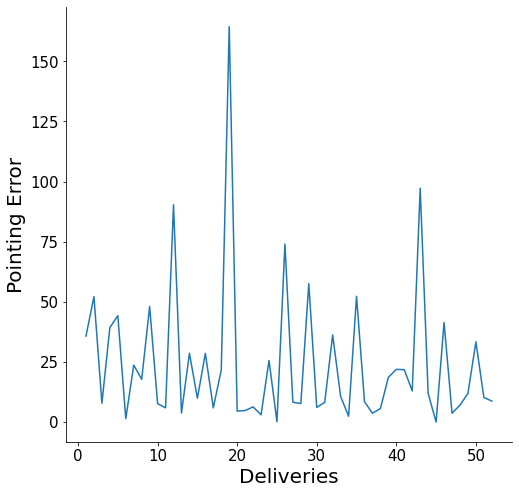

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
ax = plt.subplot(111)


plt.plot(single_index, abs(point_error_graph))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

plt.xlabel('Deliveries')
plt.ylabel('Pointing Error')
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

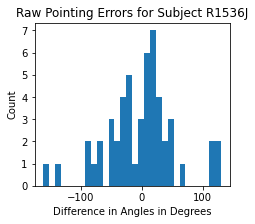

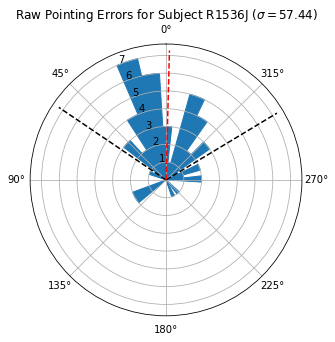

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(difference_graph, 30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Raw Pointing Errors for Subject R1536J')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, difference, offset = np.pi/2, bins = 30, density = False)
plt.title(r'Raw Pointing Errors for Subject R1536J ($\sigma = {:.2f}$)'.format(difference.std()*180/np.pi))
ax.vlines([np.mean(difference) + difference.std(), np.mean(difference)-difference.std()], 
          ymin = 0, ymax = np.max(difference.size/np.pi)*.5-1, ls = "--", colors = 'k')
ax.vlines(np.mean(difference), ymin = 0, ymax=np.max(difference.size/np.pi)*.5-1,ls = '--', colors = 'r')
plt.show()

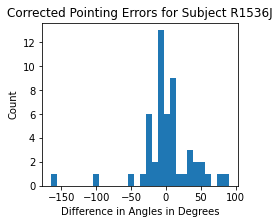

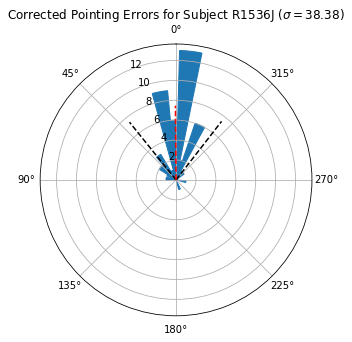

In [14]:
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(point_error_graph, 30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Corrected Pointing Errors for Subject R1536J')


plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, point_error, offset = np.pi/2, bins = 30, density = False)
plt.title('Corrected Pointing Errors for Subject R1536J ($\sigma = {:.2f}$)'.format(point_error.std()*180/np.pi))
ax.vlines([np.mean(point_error)+point_error.std(), np.mean(point_error)-point_error.std()], ymin = 0, 
          ymax = np.max(point_error.size/np.pi)*.45, ls = "--", colors = 'k')
ax.vlines(np.mean(point_error), ymin = 0, ymax=np.max(point_error.size/np.pi)*.45,ls = '--', colors = 'r')
plt.show()

In [15]:
import cmlreaders as cml
data = cml.get_data_index(kind = 'r1'); data = data[data['experiment'] == 'DBOY1']
print("Size of Dataset:")
print(len(data), 'sessions')
print(len(data['subject'].unique()), 'subjects')
data[['subject', 'session', 'experiment']]

Size of Dataset:
90 sessions
44 subjects


,subject,session,experiment
2287,R1494D,0,DBOY1
2288,R1494D,1,DBOY1
2289,R1494D,2,DBOY1
2323,R1501J,1,DBOY1
2336,R1502D,0,DBOY1
...,...,...,...
2548,R1572T,2,DBOY1
2550,R1573T,0,DBOY1
2552,R1575E,0,DBOY1
2567,R1585E,0,DBOY1


In [16]:
subject = data["subject"]
session = data['session']

In [17]:
second_sub_difference = []
average_second_sub_difference = []


for sub, sess in zip(subject, session):
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    difference = []
    
    trials = point_evs.trial.unique()
    simple_trial_mean = []
    for x in trials:
        
        trial_point_evs = point_evs[(point_evs['trial']==x)]
        submitted_point = trial_point_evs['submittedPointingDirection'] 
        correct_point = trial_point_evs['correctPointingDirection']
    
        difference = np.radians(submitted_point - correct_point)
        difference = (difference + np.pi) % (2 * np.pi) - np.pi
        simple_trial_mean.append(difference)
        
    
    simple_trial_mean = np.array(simple_trial_mean)
    simple_trial_mean = np.concatenate(simple_trial_mean).ravel()
    for x in simple_trial_mean:
        second_sub_difference.append(x)
    average_second_sub_difference.append(np.mean(simple_trial_mean))
    
average_second_sub_difference = np.array(average_second_sub_difference)
average_second_sub_difference = average_second_sub_difference[~np.isnan(average_second_sub_difference)]
second_sub_difference = np.array(second_sub_difference)
second_sub_difference

/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([ 2.76961936, -2.39764606,  0.51705379, ..., -1.02101761,
        2.52854575,  1.69842353])

In [18]:
length = []
average_sub_point_angles = []
sub_point_angles = []
for sub, sess in zip(subject, session):
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    point_evs = point_evs[(point_evs['trial']!=-999)]
    
    trials = point_evs.trial.unique()
    trial_mean = []
    for x in trials:
        
        trial_point_evs = point_evs[(point_evs['trial']==x)]
        submitted_point = trial_point_evs['submittedPointingDirection'] 
        correct_point = trial_point_evs['correctPointingDirection']


        difference = np.radians(submitted_point - correct_point)
        difference = (difference + np.pi) % (2 * np.pi) - np.pi
        difference = np.array(difference)


        store_evs = evs[(evs['storeX']!=-999) & (evs['storeZ']!=-999)]
        stores = store_evs.groupby('store')  
        stores = stores.agg('mean')[['storeX', 'storeZ']]
        storeX = stores['storeX'].values
        storeZ = stores['storeZ'].values

        pos_angles = []
        point_finished = evs[evs.type == 'pointing finished']  
        trial_point_finished = point_finished[(point_finished['trial']==x)]
        for i, finished_row in trial_point_finished.iterrows():
            position_x, position_z = finished_row[['presX', 'presZ']]
            difference_x = (storeX - position_x)
            difference_z = (storeZ - position_z)
            angle = np.arctan2(difference_z, difference_x) 
            angle = (angle + np.pi) % (2 * np.pi) - np.pi
            angle = np.abs(angle)
            
            try:
                pos_angles.append(np.median(angle - correct_point[i]))
            except Exception as e:
                print(sub, sess, e)
    
        pos_angles = np.array(pos_angles)
        pos_angles = np.radians(pos_angles)
        point_error = difference/ pos_angles #pointing error for one delivery day
        trial_mean.append(point_error) #mean of pointing error for one delivery day - so contains pointing error of all delivery days 
    
    trial_mean = np.array(trial_mean)
    trial_mean.flatten()
    for x in trial_mean:
        sub_point_angles.append(x)
    trial_mean = np.concatenate(trial_mean).ravel()
    average_sub_point_angles.append(np.mean(trial_mean)) # mean of pointing error of all delivery days - so pointing error for subject

    
sub_point_angles = np.array(sub_point_angles)
sub_point_angles = np.concatenate(sub_point_angles).ravel()
average_sub_point_angles = np.array(average_sub_point_angles)

R1503E 1 21


/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [19]:
second_sub_difference = (second_sub_difference + np.pi) % (2 * np.pi) - np.pi
second_sub_difference_graph = np.degrees(second_sub_difference)

In [20]:
average_second_sub_difference = (average_second_sub_difference + np.pi) % (2 * np.pi) - np.pi

In [21]:
sub_point_angles = (sub_point_angles + np.pi) % (2 * np.pi) - np.pi
sub_point_angles_graph = np.degrees(sub_point_angles)

In [22]:
average_sub_point_angles = (average_sub_point_angles + np.pi) % (2 * np.pi) - np.pi
average_sub_point_angles_graph = np.degrees(average_sub_point_angles)
average_second_sub_difference_graph = np.degrees(average_second_sub_difference)

In [23]:
np.mean(average_sub_point_angles_graph)

5.8558815247356595

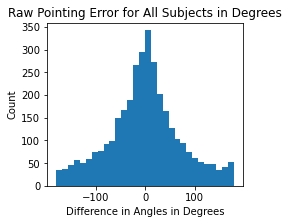

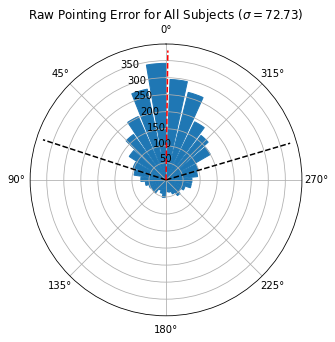

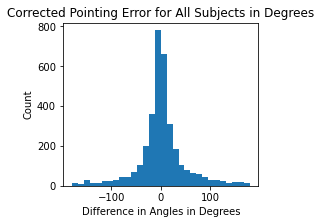

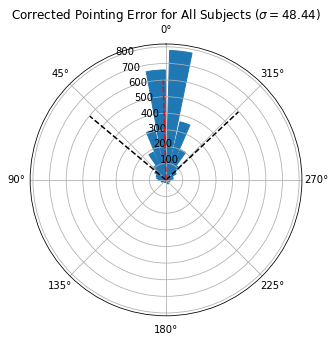

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(second_sub_difference_graph, 30)
#plt.plot(second_sub_difference_graph, norm.pdf(second_sub_difference_graph, statistics.mean(second_sub_difference_graph), statistics.stdev(second_sub_difference_graph)))
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Raw Pointing Error for All Subjects in Degrees')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, second_sub_difference, offset = np.pi/2, bins = 30, density = False)
plt.title('Raw Pointing Error for All Subjects ($\sigma = {:.2f}$)'.format(second_sub_difference.std()*180/np.pi))
ax.vlines([np.mean(second_sub_difference)+second_sub_difference.std(), np.mean(second_sub_difference)-second_sub_difference.std()], ymin = 0, 
          ymax = np.max(second_sub_difference.size/np.pi)*0.35, ls = "--", colors = 'k')
ax.vlines(np.mean(second_sub_difference), ymin = 0, ymax=np.max(second_sub_difference.size/np.pi)*0.35,ls = '--', colors = 'r')
plt.show()


plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(sub_point_angles_graph, 30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Corrected Pointing Error for All Subjects in Degrees')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, sub_point_angles, offset = np.pi/2, bins = 30, density = False)
plt.title('Corrected Pointing Error for All Subjects ($\sigma = {:.2f}$)'.format(sub_point_angles.std()*180/np.pi))
ax.vlines([np.mean(sub_point_angles)+sub_point_angles.std(), np.mean(sub_point_angles)-sub_point_angles.std()], ymin = 0, 
          ymax = np.max(sub_point_angles.size/np.pi)*.55, ls = "--", colors = 'k')
ax.vlines(np.mean(sub_point_angles), ymin = 0, ymax=np.max(sub_point_angles.size/np.pi)*.55,ls = '--', colors = 'r')
plt.show()


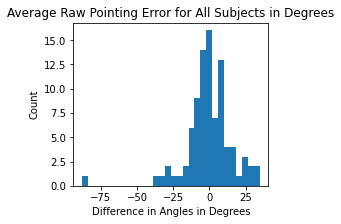

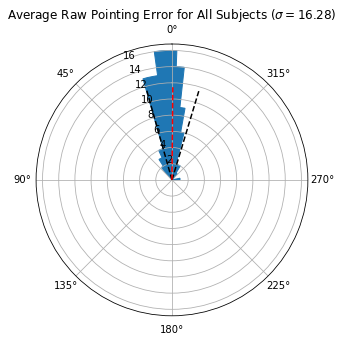

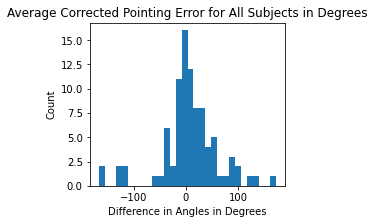

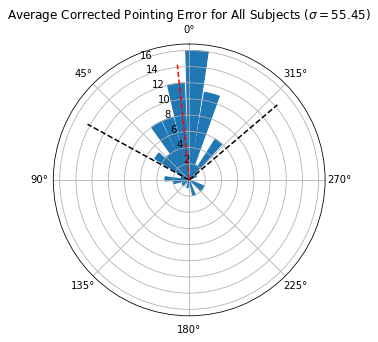

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(average_second_sub_difference_graph, 30)
#plt.plot(stats.norm.pdf(average_second_sub_difference_graph, np.mean(average_second_sub_difference_graph), average_second_sub_difference_graph.std()))
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Average Raw Pointing Error for All Subjects in Degrees')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, average_second_sub_difference, offset = np.pi/2, bins = 30, density = False)
plt.title('Average Raw Pointing Error for All Subjects ($\sigma = {:.2f}$)'.format(average_second_sub_difference.std()*180/np.pi))
ax.vlines([np.mean(average_second_sub_difference)+average_second_sub_difference.std(), 
           np.mean(average_second_sub_difference)-average_second_sub_difference.std()], 
          ymin = 0, ymax = np.max(average_second_sub_difference.size/np.pi)*.4, ls = "--", colors = 'k')
ax.vlines(np.mean(average_second_sub_difference), ymin = 0, ymax=np.max(average_second_sub_difference.size/np.pi)*.4,ls = '--', colors = 'r')
plt.show()

plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(average_sub_point_angles_graph, 30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Average Corrected Pointing Error for All Subjects in Degrees')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, average_sub_point_angles, offset = np.pi/2, bins = 30, density = False)
plt.title('Average Corrected Pointing Error for All Subjects ($\sigma = {:.2f}$)'.format(average_sub_point_angles.std()*180/np.pi))
ax.vlines([np.mean(average_sub_point_angles)+average_sub_point_angles.std(), 
           np.mean(average_sub_point_angles)-average_sub_point_angles.std()], ymin = 0, 
          ymax = np.max(average_sub_point_angles.size/np.pi)*.5, ls = "--", colors = 'k')
ax.vlines(np.mean(average_sub_point_angles), ymin = 0, ymax=np.max(average_sub_point_angles.size/np.pi)*.5,ls = '--', colors = 'r')
plt.show()

## Standard Deviations 

In [26]:
first_q_list = []
second_q_list = []
third_q_list = []
fourth_q_list = []
first_num_deliveries = []
second_num_deliveries = []
third_num_deliveries = []
fourth_num_deliveries = []

for sub, sess in zip(subject, session):
    first_q_bin = []
    second_q_bin = []
    third_q_bin = []
    fourth_q_bin = []
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    point_evs = point_evs[(point_evs['trial']>0)]
   

    submitted_point = point_evs['submittedPointingDirection'] 
    correct_point = point_evs['correctPointingDirection']


    difference = np.radians(submitted_point - correct_point)
    difference = (difference + np.pi) % (2 * np.pi) - np.pi
    difference = np.array(difference)


    store_evs = evs[(evs['storeX']!=-999) & (evs['storeZ']!=-999)]
    stores = store_evs.groupby('store')  
    stores = stores.agg('mean')[['storeX', 'storeZ']]
    storeX = stores['storeX'].values
    storeZ = stores['storeZ'].values

    pos_angles = []
    point_finished = evs[evs.type == 'pointing finished'] 
    point_finished = point_finished[(point_finished['trial']>0)]
    for i, finished_row in point_finished.iterrows():
        position_x, position_z = finished_row[['presX', 'presZ']]
        difference_x = (position_x - storeX)
        difference_z = (position_z - storeZ)
        ratio = difference_z / difference_x 
        angle = np.arctan(ratio) 
        angle[difference_x<0] += np.pi  
        #angle = np.abs(angle)
        pos_angles.append(np.median(angle)) 
        
    pos_angles = np.array(pos_angles)
    point_error = difference / pos_angles
    
    if (len(point_error) > 20):
        for x in range (len(point_error)):
            if (x > 1):
                mean = point_error[:x]
                if (x < len(point_error) / 4):
                    first_q_bin.append(np.mean(mean))
                    first_num_deliveries.append(len(mean))
                elif (x < len(point_error) * 2 / 4):
                    second_q_bin.append(np.mean(mean))
                    second_num_deliveries.append(len(mean))
                elif (x < len(point_error) * 3 / 4):
                    third_q_bin.append(np.mean(mean))
                    third_num_deliveries.append(len(mean))
                else:
                    fourth_q_bin.append(np.mean(mean))
                    fourth_num_deliveries.append(len(mean))
        
    if (len(first_q_bin) > 0):
        first_q_list.append((np.array(first_q_bin)).std())
    if (len(second_q_bin) > 0):
        second_q_list.append((np.array(second_q_bin)).std())
    if (len(third_q_bin) > 0):
        third_q_list.append((np.array(third_q_bin)).std())
    if (len(fourth_q_bin) > 0):
        fourth_q_list.append((np.array(fourth_q_bin)).std())

    print(np.degrees(first_q_bin))
print(len(first_q_list))
print(len(fourth_q_list))
first_q_list = np.array(first_q_list)
second_q_list = np.array(second_q_list)
third_q_list = np.array(third_q_list)
fourth_q_list = np.array(fourth_q_list)



quartile_std_std = [first_q_list.std(), second_q_list.std(), third_q_list.std(), fourth_q_list.std()]
quartile_std_mean = [np.mean(first_q_list), np.mean(second_q_list), np.mean(third_q_list), np.mean(fourth_q_list)]
quartile_std_mean = np.array(quartile_std_mean)
quartile_std_mean = np.degrees(quartile_std_mean)

index = [np.mean(first_num_deliveries), np.mean(second_num_deliveries), np.mean(third_num_deliveries), np.mean(fourth_num_deliveries)]


quartile_std_err = [scipy.stats.sem(first_q_list), scipy.stats.sem(second_q_list), scipy.stats.sem(third_q_list), scipy.stats.sem(fourth_q_list)]
quartile_std_err = np.array(quartile_std_err)
quartile_std_err = np.degrees(quartile_std_err)

/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


[ 73.32175252 120.49605028  69.32410092  55.9528117   47.39488337
  19.5228541   -0.91935371   4.29757614 160.83492879 148.19830501
 133.18857462]
[  28.12434397   19.99162416 -113.42984473 -252.51755167 -213.47122367
 -186.61130227 -166.39078364 -148.61042774 -132.4792159  -121.59752606
 -111.52680436]
[ 50.67271368  28.90000685  33.22765081  39.02175389  29.10085484
 157.96187081 136.34331937 113.22731002 100.93181717  76.31821853
  70.45932656]
[-6.54052173  2.15224002  5.04206785  6.65784409  8.81513881  8.23237507
  8.40049507 11.98796359 12.4252953   9.31640709 11.71386226 11.95041143
 12.99859572 13.3345103  13.47679441]
[ 11.34488858 135.35412062  90.17374885  45.64153068  49.86587912
  40.42049611 -67.46655214 -48.42933349 -29.84084863 -25.06609161
 -26.16394655 -24.34530568 -20.34915065 -29.35681157 -28.95389468]
[ 375.9966308   246.79835722  195.37350864  145.00584446  129.23536815
  119.96109954  103.70267489   93.8067397    84.82366827  -93.41892447
  -86.30385236  -85.057

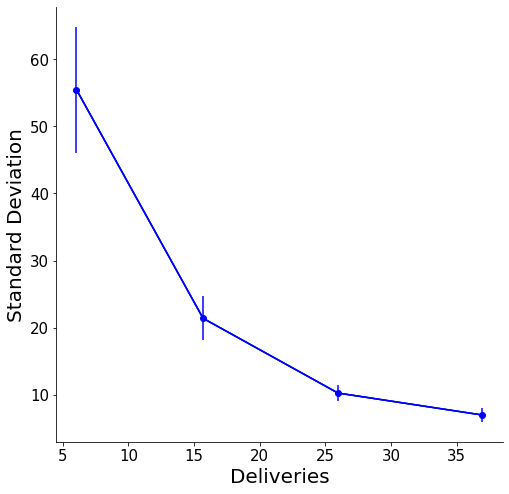

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
ax = plt.subplot(111)


plt.plot(index, quartile_std_mean)
plt.plot(index, quartile_std_mean, "-o", color = 'b')
plt.errorbar(index, quartile_std_mean, quartile_std_err, color = 'b')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)

plt.xlabel('Deliveries')
plt.ylabel('Standard Deviation')
axes = plt.gca()
axes.xaxis.label.set_size(20)
axes.yaxis.label.set_size(20)
#plt.title('Average Standard Deviation by Quartile of All Deliveries for 32 Subjects')

### Comparing Pointing Error of Various Subjects

In [28]:
from pointing_utils import *

/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide


R1503E 1 21


/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true

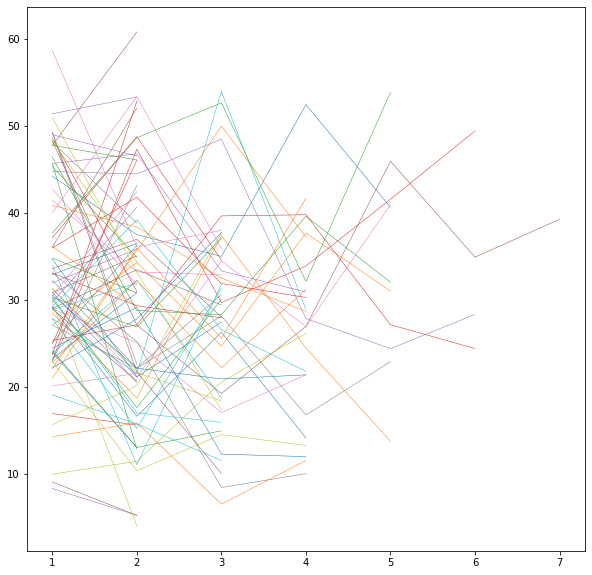

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plt.subplot(111)

for sub, sess in zip(subject, session):
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    point_evs = point_evs[(point_evs['trial']!=-999)]
    
    trials = point_evs.trial.unique()
    trial_mean = []
    for x in trials:
        
        trial_point_evs = point_evs[(point_evs['trial']==x)]
        submitted_point = trial_point_evs['submittedPointingDirection'] 
        correct_point = trial_point_evs['correctPointingDirection']


        difference = np.radians(submitted_point - correct_point)
        difference = (difference + np.pi) % (2 * np.pi) - np.pi
        difference = np.array(difference)


        store_evs = evs[(evs['storeX']!=-999) & (evs['storeZ']!=-999)]
        stores = store_evs.groupby('store')  
        stores = stores.agg('mean')[['storeX', 'storeZ']]
        storeX = stores['storeX'].values
        storeZ = stores['storeZ'].values

        pos_angles = []
        point_finished = evs[evs.type == 'pointing finished']  
        trial_point_finished = point_finished[(point_finished['trial']==x)]
        for i, finished_row in trial_point_finished.iterrows():
            position_x, position_z = finished_row[['presX', 'presZ']]
            difference_x = (position_x - storeX)
            difference_z = (position_z - storeZ)
            ratio = difference_z / difference_x 
            angle = np.arctan(ratio) 
            angle = (angle + np.pi) % (2 * np.pi) - np.pi
            angle = np.abs(angle)
            
            try:
                pos_angles.append(np.median(angle - correct_point[i]))
            except Exception as e:
                print(sub, sess, e)
    
        pos_angles = np.array(pos_angles)
        pos_angles = np.radians(pos_angles)
        point_error = difference/ pos_angles #pointing error for one delivery day
        point_error = (point_error + np.pi) % (2 * np.pi) - np.pi
        trial_mean.append(np.nanmean(abs(point_error))) #mean of pointing error for one delivery day - so contains pointing error of all delivery days 
        
        
    trial_mean = np.degrees(trial_mean)
    trial_index = np.array(range(len(trial_mean)))
    trial_index = trial_index + 1
    plt.plot(trial_index, trial_mean, linewidth=0.5)

## Early Pointing Error

In [30]:
early_second_sub_difference = []


for sub, sess in zip(subject, session):
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    point_evs = point_evs[(point_evs['trial'] >0)]
    trials = point_evs.trial.unique()
    if len(trials > 0):
        point_evs = point_evs[(point_evs['trial'] < len(trials)/2 + 1)]

        difference = []

        trials = point_evs.trial.unique()
        early_simple_trial_mean = []
        for x in trials:
            trial_point_evs = point_evs[(point_evs['trial']==x)]
            submitted_point = trial_point_evs['submittedPointingDirection'] 
            correct_point = trial_point_evs['correctPointingDirection']

            difference = np.radians(submitted_point - correct_point)
            difference = (difference + np.pi) % (2 * np.pi) - np.pi
            early_simple_trial_mean.append(difference)

        early_simple_trial_mean = np.array(early_simple_trial_mean)
        early_simple_trial_mean.flatten
        if (len(early_simple_trial_mean)>0):
            early_second_sub_difference.append(np.mean(early_simple_trial_mean))
    
early_second_sub_difference = np.array(early_second_sub_difference)


In [31]:
early_sub_point_angles = []
for sub, sess in zip(subject, session):
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    point_evs = point_evs[(point_evs['trial'] >0)]
    trials = point_evs.trial.unique()

    if (len(trials)>0):
        point_evs = point_evs[(point_evs['trial'] < len(trials)/2 + 1)]

        trials = point_evs.trial.unique()


        early_trial_mean = []
        for x in trials:

            trial_point_evs = point_evs[(point_evs['trial']==x)]
            submitted_point = trial_point_evs['submittedPointingDirection'] 
            correct_point = trial_point_evs['correctPointingDirection']


            difference = np.radians(submitted_point - correct_point)
            difference = (difference + np.pi) % (2 * np.pi) - np.pi
            difference = np.array(difference)


            store_evs = evs[(evs['storeX']!=-999) & (evs['storeZ']!=-999)]
            stores = store_evs.groupby('store')  
            stores = stores.agg('mean')[['storeX', 'storeZ']]
            storeX = stores['storeX'].values
            storeZ = stores['storeZ'].values

            pos_angles = []
            point_finished = evs[evs.type == 'pointing finished']  
            trial_point_finished = point_finished[(point_finished['trial']==x)]
            for i, finished_row in trial_point_finished.iterrows():
                position_x, position_z = finished_row[['presX', 'presZ']]
                difference_x = (storeX - position_x)
                difference_z = (storeZ - position_z)
                angle = np.arctan2(difference_z, difference_x) 
                angle = (angle + np.pi) % (2 * np.pi) - np.pi
                angle = np.abs(angle)
            
                try:
                    pos_angles.append(np.median(angle - correct_point[i]))
                except Exception as e:
                    print(sub, sess, e)
    
            pos_angles = np.array(pos_angles)
            pos_angles = np.radians(pos_angles)

            point_error = difference / pos_angles
            early_trial_mean.append(point_error) 

        early_trial_mean = np.array(early_trial_mean)
        early_trial_mean.flatten()
        early_sub_point_angles.append(np.mean(early_trial_mean)) 

early_sub_point_angles = np.array(early_sub_point_angles)

In [32]:
early_second_sub_difference = (early_second_sub_difference + np.pi) % (2 * np.pi) - np.pi
early_sub_point_angles = (early_sub_point_angles + np.pi) % (2 * np.pi) - np.pi
early_second_sub_difference_graph = np.degrees(early_second_sub_difference)
early_sub_point_angles_graph = np.degrees(early_sub_point_angles)

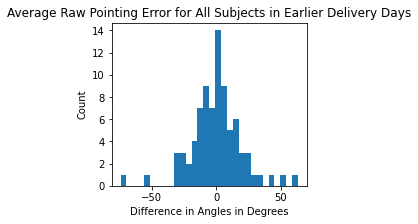

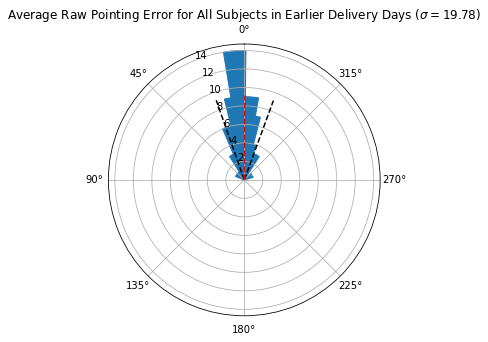

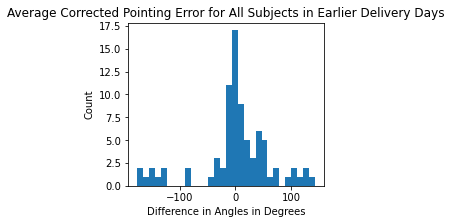

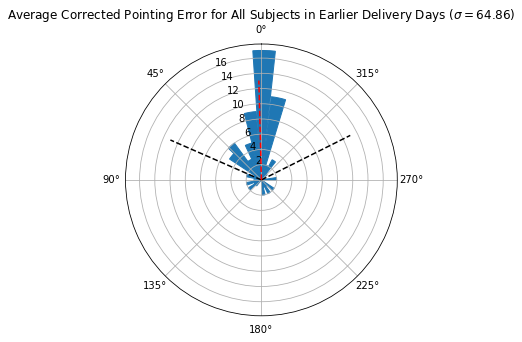

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(early_second_sub_difference_graph, 30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Average Raw Pointing Error for All Subjects in Earlier Delivery Days')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, early_second_sub_difference, offset = np.pi/2, bins = 30, density = False)
plt.title('Average Raw Pointing Error for All Subjects in Earlier Delivery Days ($\sigma = {:.2f}$)'.format(early_second_sub_difference.std()*180/np.pi))
ax.vlines([np.mean(early_second_sub_difference)+early_second_sub_difference.std(), 
           np.mean(early_second_sub_difference)-early_second_sub_difference.std()], ymin = 0, 
          ymax = np.max(early_second_sub_difference.size/np.pi)*.35, ls = "--", colors = 'k')
ax.vlines(np.mean(early_second_sub_difference), ymin = 0, ymax=np.max(early_second_sub_difference.size/np.pi)*.35,ls = '--', colors = 'r')
plt.show()


plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(early_sub_point_angles_graph, 30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Average Corrected Pointing Error for All Subjects in Earlier Delivery Days')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, early_sub_point_angles, offset = np.pi/2, bins = 30, density = False)
plt.title('Average Corrected Pointing Error for All Subjects in Earlier Delivery Days ($\sigma = {:.2f}$)'.format(early_sub_point_angles.std()*180/np.pi))
ax.vlines([np.mean(early_sub_point_angles)+early_sub_point_angles.std(), 
           np.mean(early_sub_point_angles)-early_sub_point_angles.std()], ymin = 0, 
          ymax = np.max(early_sub_point_angles.size/np.pi)*.5, ls = "--", colors = 'k')
ax.vlines(np.mean(early_sub_point_angles), ymin = 0, ymax=np.max(early_sub_point_angles.size/np.pi)*.5,ls = '--', colors = 'r')
plt.show()

In [34]:
later_second_sub_difference = []

for sub, sess in zip(subject, session):
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    point_evs = point_evs[(point_evs['trial'] >0)]
    trials = point_evs.trial.unique()
    if len(trials > 0):
        point_evs = point_evs[(point_evs['trial'] >= len(trials)/2 - 1)]

        difference = []

        trials = point_evs.trial.unique()
        later_simple_trial_mean = []
        for x in trials:
            trial_point_evs = point_evs[(point_evs['trial']==x)]
            submitted_point = trial_point_evs['submittedPointingDirection'] 
            correct_point = trial_point_evs['correctPointingDirection']

            difference = np.radians(submitted_point - correct_point)
            difference = (difference + np.pi) % (2 * np.pi) - np.pi
            later_simple_trial_mean.append(difference)

        later_simple_trial_mean = np.array(later_simple_trial_mean)
        later_simple_trial_mean.flatten
        if (len(later_simple_trial_mean)>0):
            later_second_sub_difference.append(np.mean(later_simple_trial_mean))
    
later_second_sub_difference = np.array(later_second_sub_difference)

/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [35]:
later_sub_point_angles = []

for sub, sess in zip(subject, session):
    reader = CMLReader(sub, 'DBOY1', sess, montage=mont, localization=loc)  
    evs = reader.load('task_events')
    point_evs = evs[(evs['submittedPointingDirection']>0)]
    point_evs = point_evs[(point_evs['trial'] >0)]
    trials = point_evs.trial.unique()

    if (len(trials)>0):
        point_evs = point_evs[(point_evs['trial'] >= len(trials)/2 - 1)]

        trials = point_evs.trial.unique()


        later_trial_mean = []
        for x in trials:

            trial_point_evs = point_evs[(point_evs['trial']==x)]
            submitted_point = trial_point_evs['submittedPointingDirection'] 
            correct_point = trial_point_evs['correctPointingDirection']


            difference = np.radians(submitted_point - correct_point)
            difference = (difference + np.pi) % (2 * np.pi) - np.pi
            difference = np.array(difference)


            store_evs = evs[(evs['storeX']!=-999) & (evs['storeZ']!=-999)]
            stores = store_evs.groupby('store')  
            stores = stores.agg('mean')[['storeX', 'storeZ']]
            storeX = stores['storeX'].values
            storeZ = stores['storeZ'].values

            pos_angles = []
            point_finished = evs[evs.type == 'pointing finished']  
            trial_point_finished = point_finished[(point_finished['trial']==x)]
            for i, finished_row in trial_point_finished.iterrows():
                position_x, position_z = finished_row[['presX', 'presZ']]
                difference_x = (storeX - position_x)
                difference_z = (storeZ - position_z)
                angle = np.arctan2(difference_z, difference_x) 
                angle = (angle + np.pi) % (2 * np.pi) - np.pi
                angle = np.abs(angle)
            
                try:
                    pos_angles.append(np.median(angle - correct_point[i]))
                except Exception as e:
                    print(sub, sess, e)
    
            pos_angles = np.array(pos_angles)
            pos_angles = np.radians(pos_angles)

            point_error = difference / pos_angles
            later_trial_mean.append(point_error) 

        later_trial_mean = np.array(later_trial_mean)
        later_trial_mean.flatten()
        try:
            later_mean = (np.mean(later_trial_mean))
        except Exception as e:
                exception_trial = []
                for x in later_trial_mean:
                    for y in x:
                        exception_trial.append(y)
                later_mean = np.mean(exception_trial)
        later_sub_point_angles.append(later_mean) 

later_sub_point_angles = np.array(later_sub_point_angles)


/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home1/dtantry/.conda/envs/CML3/lib/python3.7/site-packages/ipykernel_launcher.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [36]:
print(type(later_sub_point_angles))

<class 'numpy.ndarray'>


In [37]:
later_second_sub_difference = (later_second_sub_difference + np.pi) % (2 * np.pi) - np.pi
later_sub_point_angles = (later_sub_point_angles + np.pi) % (2 * np.pi) - np.pi
later_second_sub_difference_graph = np.degrees(later_second_sub_difference)
later_sub_point_angles_graph = np.degrees(later_sub_point_angles)

TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable degrees method

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(later_second_sub_difference_graph,30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Raw Pointing Error Later in Time')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, later_second_sub_difference, offset = np.pi/2, bins = 30, density = False)
plt.title('Average Raw Pointing Error for All Subjects in Later Delivery Days ($\sigma = {:.2f}$)'.format(later_second_sub_difference.std()*180/np.pi))
ax.vlines([np.mean(later_second_sub_difference)+later_second_sub_difference.std(), 
           np.mean(later_second_sub_difference)-later_second_sub_difference.std()], ymin = 0, 
          ymax = np.max(later_second_sub_difference.size/np.pi)*.4, ls = "--", colors = 'k')
ax.vlines(np.mean(later_second_sub_difference), ymin = 0, ymax=np.max(later_second_sub_difference.size/np.pi)*.4,ls = '--', colors = 'r')



plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.hist(later_sub_point_angles_graph, 30)
plt.xlabel('Difference in Angles in Degrees')
plt.ylabel('Count')
plt.title('Corrected Pointing Error Later in Time')


plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, later_sub_point_angles, offset = np.pi/2, bins = 30, density = False)
plt.title('Average Corrected Pointing Error for All Subjects in Later Delivery Days ($\sigma = {:.2f}$)'.format(later_sub_point_angles.std()*180/np.pi))
ax.vlines([np.mean(later_sub_point_angles)+later_sub_point_angles.std(), 
           np.mean(later_sub_point_angles)-later_sub_point_angles.std()], ymin = 0, 
          ymax = np.max(later_sub_point_angles.size/np.pi)*.6, ls = "--", colors = 'k')
ax.vlines(np.mean(later_sub_point_angles), ymin = 0, ymax=np.max(later_sub_point_angles.size/np.pi)*.6,ls = '--', colors = 'r')